In [1]:
from Bio.PDB import PDBParser
from Bio.SeqUtils import seq1
import biographs as bg
import networkx as nx

In [2]:
parser = PDBParser()

In [5]:
structure = parser.get_structure(2, get_file('C1TC_HUMAN'))

In [6]:
structure.get_list()

[<Model id=0>]

In [7]:
molecule = bg.Pmolecule(get_file('C1TC_HUMAN'))

In [8]:
network = molecule.network()

In [9]:
nx.adjacency_matrix(network).todense()

array([[ 0, 23,  5, ...,  0,  0,  0],
       [23,  0, 30, ...,  0,  0,  0],
       [ 5, 30,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0, 22,  6],
       [ 0,  0,  0, ..., 22,  0, 53],
       [ 0,  0,  0, ...,  6, 53,  0]], dtype=int32)

In [17]:
next(nx.generate_edgelist(network))

"A1 A2 {'weight': 23}"

In [23]:
import numpy as np
l = np.asarray(list(network.edges)).T
edge_list = [[int(s[1:]) for s in l[0]], [int(s[1:]) for s in l[1]]]
display(l)
display(np.asarray(edge_list))

array([['A1', 'A1', 'A1', ..., 'A933', 'A933', 'A934'],
       ['A2', 'A3', 'A263', ..., 'A934', 'A935', 'A935']], dtype='<U4')

array([[  1,   1,   1, ..., 933, 933, 934],
       [  2,   3, 263, ..., 934, 935, 935]])

In [65]:
network.nodes

NodeView(('A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69', 'A70', 'A71', 'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A79', 'A80', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'A100', 'A101', 'A102', 'A103', 'A104', 'A105', 'A106', 'A107', 'A108', 'A109', 'A110', 'A111', 'A112', 'A113', 'A114', 'A115', 'A116', 'A117', 'A118', 'A119', 'A120', 'A121', 'A122', 'A123', 'A124', 'A125', 'A126', 'A127', 'A128', 'A129', 'A130', 'A131', 'A132', 'A133', 'A134', 'A135', 'A136', 'A137', 'A

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('./data/af2_dataset_training_labeled.csv')
"".join(df[df['entry'] == 'GEMI5_HUMAN']['annotation_sequence'].values)

'MGQEPRTLPPSPNWYCARCSDAVPGGLFGFAARTSVFLVRVGPGAGESPGTPPFRVIGELVGHTERVSGFTFSHHPGQYNLCATSSDDGTVKIWDVETKTVVTEHALHQHTISTLHWSPRVKDLIVSGDEKGVVFCYWFNRNDSQHLFIEPRTIFCLTCSPHHEDLVAIGYKDGIVVIIDISKKGEVIHRLRGHDDEIHSIAWCPLPGEDCLSINQEETSEEAEITNGNAVAQAPVTKGCYLATGSKDQTIRIWSCSRGRGVMILKLPFLKRRGGGIDPTVKERLWLTLHWPSNQPTQLVSSCFGGELLQWDLTQSWRRKYTLFSASSEGQNHSRIVFNLCPLQTEDDKQLLLSTSMDRDVKCWDIATLECSWTLPSLGGFAYSLAFSSVDIGSLAIGVGDGMIRVWNTLSIKNNYDVKNFWQGVKSKVTALCWHPTKEGCLAFGTDDGKVGLYDTYSNKPPQISSTYHKKTVYTLAWGPPVPPMSLGGEGDRPSLALYSCGGEGIVLQHNPWKLSGEAFDINKLIRDTNSIKYKLPVHTEISWKADGKIMALGNEDGSIEIFQIPNLKLICTIQQHHKLVNTISWHHEHGSQPELSYLMASGSNNAVIYVHNLKTVIESSPESPVTITEPYRTLSGHTAKITSVAWSPHHDGRLVSASYDGTAQVWDALREEPLCNFRGHRGRLLCVAWSPLDPDCIYSGADDFCVHKWLTSMQDHSRPPQGKKSIELEKKRLSQPKAKPKKKKKPTLRTPVKLESIDGNEEESMKENSGPVENGVSDQEGEEQAREPELPCGLAPAVSREPVICTPVSSGFEKSKVTINNKVILLKKEPPKEKPETLIKKRKARSLLPLSTSLDHRSKEELHQDCLVLATAKHSRELNEDVSADVEERFHLGLFTDRATLYRMIDIEGKGHLENGHPELFHQLMLWKGDLKGVLQTAAERGELTDNLVAMAPAAGYHVWLWAVEAFAKQLCFQDQYVKAASHLLSIHKVYEAVELLK

In [40]:
u = pd.DataFrame(df['entry'].unique())
u.index[u[0] == 'NF1_HUMAN']

Int64Index([72], dtype='int64')

In [9]:
chains = {chain.id:seq1(''.join(residue.resname for residue in chain)) for chain in structure.get_chains()}

In [11]:
chains

{'A': 'DERDRVQKKTFTKWVNKHLMKVRKHINDLYEDLRDGHNLISLLEVLSGIKLPREKGRMRFHRLQNVQIALDFLKQRQVKLVNIRNDDITDGNPKLTLGLIWTIILHFQISDIYISGESGDMSAKEKLLLWTQKVTAGYTGIKCTNFSSCWSDGKMFNALIHRYRPDLVDMERVQIQSNRENLEQAFEVAERLGVTRLLDAEDVDVPSPDEKSVITYVSSIYDAFPKVPEGGEGISATEVDSRWQEYQSRVDSLIPWIKQHTILMSDNQYIHFKETEILAKEREKGRIEELYKLLEVWIEFGRIKLPQGYHPNDVEEEWGKLIIEMLEREKSLRPXXXXXXXXXXXXXXXXXXXXXXXXXX'}

In [3]:
import requests
import sys
import os
import re

In [4]:
def get_file(name):
    other = {
        'CMC2_HUMAN': 'Q9UJS0',
        'ST2A1_HUMAN': 'Q06520',
        'TNS2_HUMAN': 'Q63HR2',
        'M4K3_HUMAN': 'Q8IVH8',
    }
    if name in other.keys():
        print('other')
        accession = other[name]
    else:
        requestURL = "https://rest.uniprot.org/uniprotkb/search?fields=accession%2Creviewed%2Cid%2Cprotein_name%2Cgene_names%2Corganism_name%2Clength&query=%28{}%29".format(name)
        r = requests.get(requestURL, headers={ "Accept" : "application/json"})
        if not r.ok:
            r.raise_for_status()
            sys.exit()
        accession = r.json()['results'][0]['primaryAccession']

    rootdir = './data/AF2 Dataset'
    regex = re.compile(f"^.*{accession}.*$")

    for file in os.listdir(rootdir):
        if regex.match(file):
            return rootdir + '/' + file
    assert 5 == 6

In [60]:
parser = PDBParser()

skip_list = ['NF1_HUMAN', 'MACF1_HUMAN', 'HUWE1_HUMAN', 'C1TC_HUMAN', 'DMD_HUMAN']
okay_list = ['C1TC_HUMAN']
conversion = {}

i = 0
for name in df['entry'].unique()[650:]:
    print(i)
    if name in skip_list:
        print(f"skipping {name}")
        continue
    i += 1
    file = get_file(name)
    conversion['name'] = file
    structure = parser.get_structure(1, file)
    p1 = {chain.id:seq1(''.join(residue.resname for residue in chain)) for chain in structure.get_chains()}['A']
    p2 = "".join(df[df['entry'] == name]['annotation_sequence'].values)
    print(name)
    print(p1)
    print(p2)
    assert p1[:len(p2)] == p2

0
DNMT1_HUMAN
MPARTAPARVPTLAVPAISLPDDVRRRLKDLERDSLTEKECVKEKLNLLHEFLQTEIKNQLCDLETKLRKEELSEEGYLAKVKSLLNKDLSLENGAHAYNREVNGRLENGNQARSEARRVGMADANSPPKPLSKPRTPRRSKSDGEAKPEPSPSPRITRKSTRQTTITSHFAKGPAKRKPQEESERAKSDESIKEEDKDQDEKRRRVTSRERVARPLPAEEPERAKSGTRTEKEEERDEKEEKRLRSQTKEPTPKQKLKEEPDREARAGVQADEDEDGDEKDEKKHRSQPKDLAAKRRPEEKEPEKVNPQISDEKDEDEKEEKRRKTTPKEPTEKKMARAKTVMNSKTHPPKCIQCGQYLDDPDLKYGQHPPDAVDEPQMLTNEKLSIFDANESGFESYEALPQHKLTCFSVYCKHGHLCPIDTGLIEKNIELFFSGSAKPIYDDDPSLEGGVNGKNLGPINEWWITGFDGGEKALIGFSTSFAEYILMDPSPEYAPIFGLMQEKIYISKIVVEFLQSNSDSTYEDLINKIETTVPPSGLNLNRFTEDSLLRHAQFVVEQVESYDEAGDSDEQPIFLTPCMRDLIKLAGVTLGQRRAQARRQTIRHSTREKDRGPTKATTTKLVYQIFDTFFAEQIEKDDREDKENAFKRRRCGVCEVCQQPECGKCKACKDMVKFGGSGRSKQACQERRCPNMAMKEADDDEEVDDNIPEMPSPKKMHQGKKKKQNKNRISWVGEAVKTDGKKSYYKKVCIDAETLEVGDCVSVIPDDSSKPLYLARVTALWEDSSNGQMFHAHWFCAGTDTVLGATSDPLELFLVDECEDMQLSYIHSKVKVIYKAPSENWAMEGGMDPESLLEGDDGKTYFYQLWYDQDYARFESPPKTQPTEDNKFKFCVSCARLAEMRQKEIPRVLEQLEDLDSRVLYYSATKNGILYRVGDGVYLPPEAFTFNIKLSSPVKRPRKEPVDEDLYPEHYRKYSDYIKGSNLD

In [ ]:
conversion

In [202]:
u = df['entry'].unique()
u

In [66]:
name = 'C1TC_HUMAN'
file = get_file(name)
structure = parser.get_structure(1, file)
p1 = {chain.id:seq1(''.join(residue.resname for residue in chain)) for chain in structure.get_chains()}['A']
p2 = "".join(df[df['entry'] == name]['annotation_sequence'].values)

In [67]:
p1

'MAPAEILNGKEISAQIRARLKNQVTQLKEQVPGFTPRLAILQVGNRDDSNLYINVKLKAAEEIGIKATHIKLPRTTTESEVMKYITSLNEDSTVHGFLVQLPLDSENSINTEEVINAIAPEKDVDGLTSINAGKLARGDLNDCFIPCTPKGCLELIKETGVPIAGRHAVVVGRSKIVGAPMHDLLLWNNATVTTCHSKTAHLDEEVNKGDILVVATGQPEMVKGEWIKPGAIVIDCGINYVPDDKKPNGRKVVGDVAYDEAKERASFITPVPGGVGPMTVAMLMQSTVESAKRFLEKFKPGKWMIQYNNLNLKTPVPSDIDISRSCKPKPIGKLAREIGLLSEEVELYGETKAKVLLSALERLKHRPDGKYVVVTGITPTPLGEGKSTTTIGLVQALGAHLYQNVFACVRQPSQGPTFGIKGGAAGGGYSQVIPMEEFNLHLTGDIHAITAANNLVAAAIDARIFHELTQTDKALFNRLVPSVNGVRRFSDIQIRRLKRLGIEKTDPTTLTDEEINRFARLDIDPETITWQRVLDTNDRFLRKITIGQAPTEKGHTRTAQFDISVASEIMAVLALTTSLEDMRERLGKMVVASSKKGEPVSAEDLGVSGALTVLMKDAIKPNLMQTLEGTPVFVHAGPFANIAHGNSSIIADRIALKLVGPEGFVVTEAGFGADIGMEKFFNIKCRYSGLCPHVVVLVATVRALKMHGGGPTVTAGLPLPKAYIQENLELVEKGFSNLKKQIENARMFGIPVVVAVNAFKTDTESELDLISRLSREHGAFDAVKCTHWAEGGKGALALAQAVQRAAQAPSSFQLLYDLKLPVEDKIRIIAQKIYGADDIELLPEAQHKAEVYTKQGFGNLPICMAKTHLSLSHNPEQKGVPTGFILPIRDIRASVGAGFLYPLVGTMSTMPGLPTRPCFYDIDLDPETEQVNGLF'

In [68]:
p2

'MAPAEILNGKEISAQIRARLKNQVTQLKEQVPGFTPRLAILQVGNRDDSNLYINVKLKAAEEIGIKATHIKLPRTTTESEVMKYITSLNEDSTVHGFLVQLPLDSENSINTEEVINAIAPEKDVDGLTSINAGRLARGDLNDCFIPCTPKGCLELIKETGVPIAGRHAVVVGRSKIVGAPMHDLLLWNNATVTTCHSKTAHLDEEVNKGDILVVATGQPEMVKGEWIKPGAIVIDCGINYVPDDKKPNGRKVVGDVAYDEAKERASFITPVPGGVGPMTVAMLMQSTVESAKRFLEKFKPGKWMIQYNNLNLKTPVPSDIDISRSCKPKPIGKLAREIGLLSEEVELYGETKAKVLLSALERLKHRPDGKYVVVTGITPTPLGEGKSTTTIGLVQALGAHLYQNVFACVRQPSQGPTFGIKGGAAGGGYSQVIPMEEFNLHLTGDIHAITAANNLVAAAIDARIFHELTQTDKALFNRLVPSVNGVRRFSDIQIRRLKRLGIEKTDPTTLTDEEINRFARLDIDPETITWQRVLDTNDRFLRKITIGQAPTEKGHTRTAQFDISVASEIMAVLALTTSLEDMRERLGKMVVASSKKGEPVSAEDLGVSGALTVLMKDAIKPNLMQTLEGTPVFVHAGPFANIAHGNSSIIADRIALKLVGPEGFVVTEAGFGADIGMEKFFNIKCRYSGLCPHVVVLVATVRALKMHGGGPTVTAGLPLPKAYIQENLELVEKGFSNLKKQIENARMFGIPVVVAVNAFKTDTESELDLISRLSREHGAFDAVKCTHWAEGGKGALALAQAVQRAAQAPSSFQLLYDLKLPVEDKIRIIAQKIYGADDIELLPEAQHKAEVYTKQGFGNLPICMAKTHLSLSHNPEQKGVPTGFILPIRDIRASVGAGFLYPLVGTMSTMPGLPTRPCFYDIDLDPETEQVN'

In [77]:
len(p1)

935

In [78]:
len(p2)

932

In [134]:
molecule = bg.Pmolecule(file)
network = molecule.network()

for i in range(len(p2) + 1, len(p1) + 1):
    node_to_remove = 'A' + str(i)
    network.remove_node(node_to_remove)

matrix = nx.adjacency_matrix(network).todense()

In [135]:
matrix

array([[ 0, 23,  5, ...,  0,  0,  0],
       [23,  0, 30, ...,  0,  0,  0],
       [ 5, 30,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0, 25, 12],
       [ 0,  0,  0, ..., 25,  0, 33],
       [ 0,  0,  0, ..., 12, 33,  0]], dtype=int32)

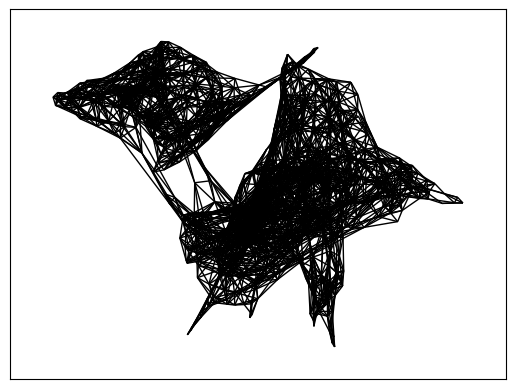

In [136]:
nx.draw_networkx(network, node_size=0, with_labels=False)